In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data_traffic = pd.read_excel("/content/drive/My Drive/Colab Notebooks/BigData_Report/traffic1.xlsx", sheet_name=None)
data_questions = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigData_Report/questions.csv")

# Traffic Volume Analysis

## Hourly Traffic Flow Graphs

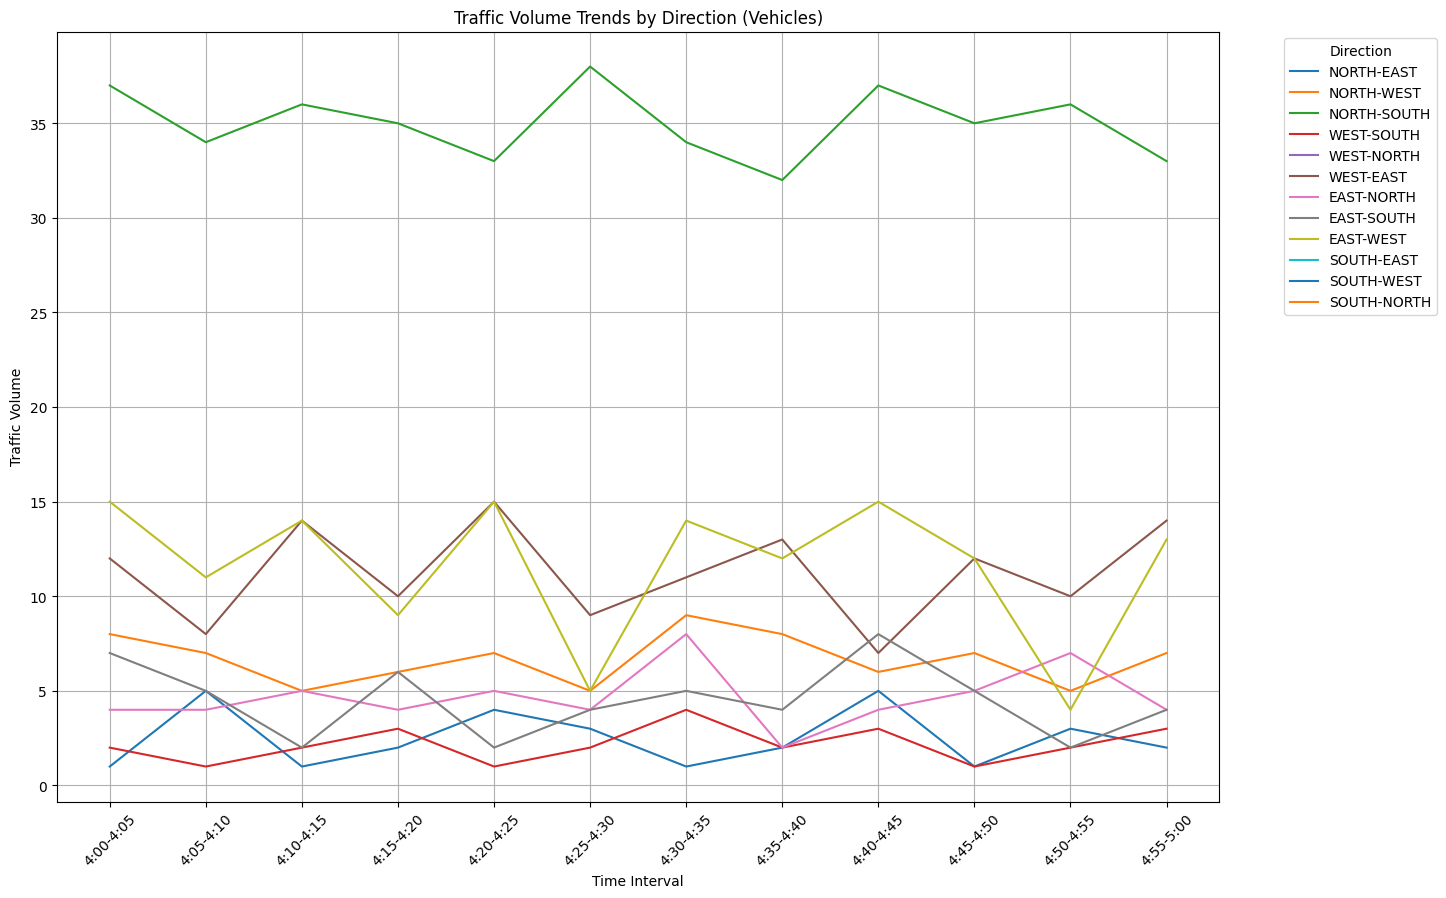

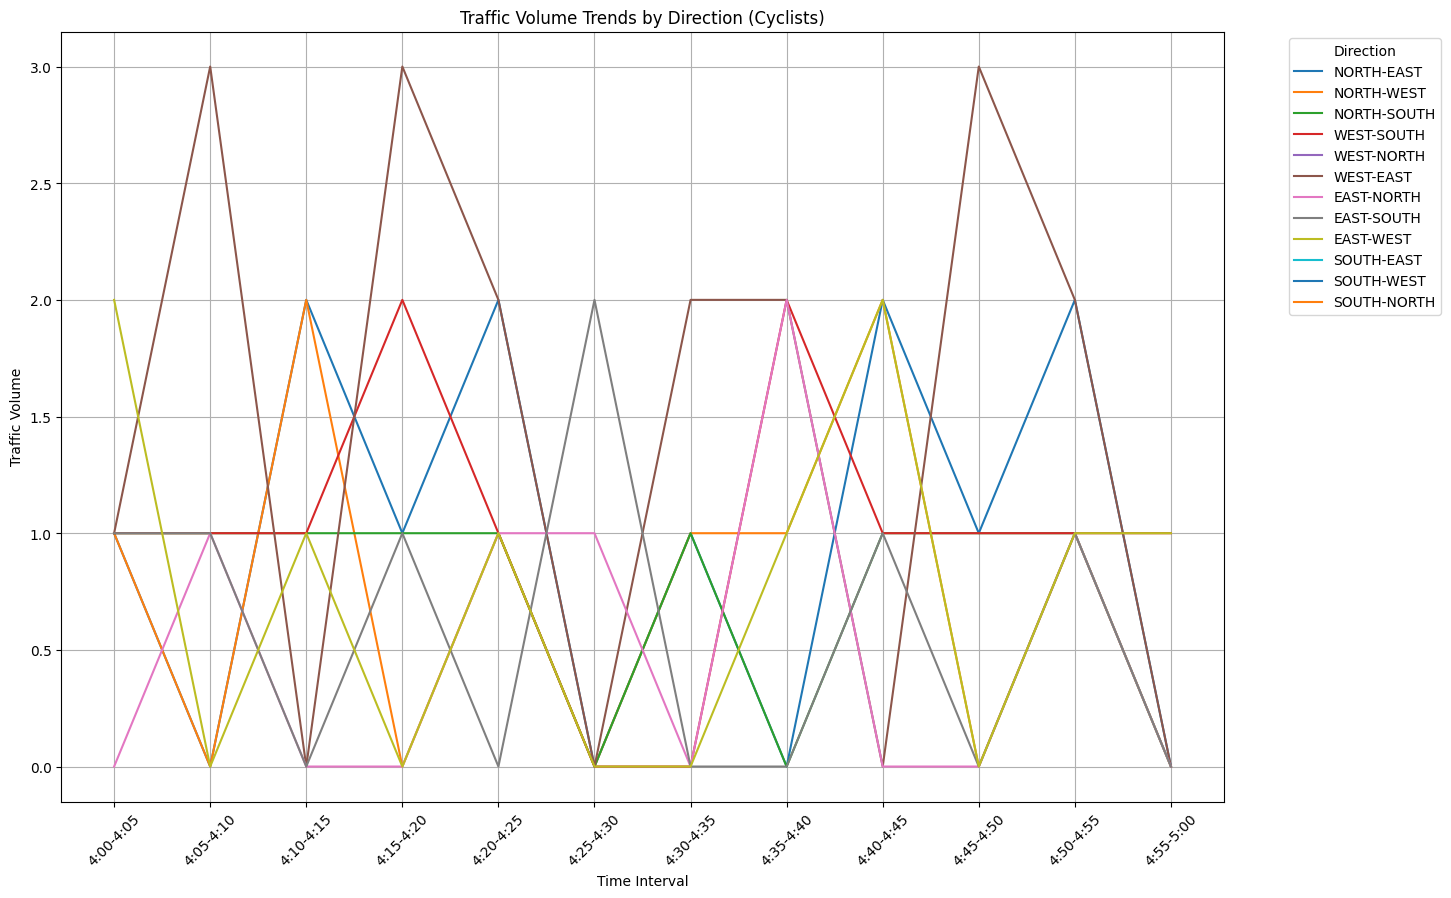

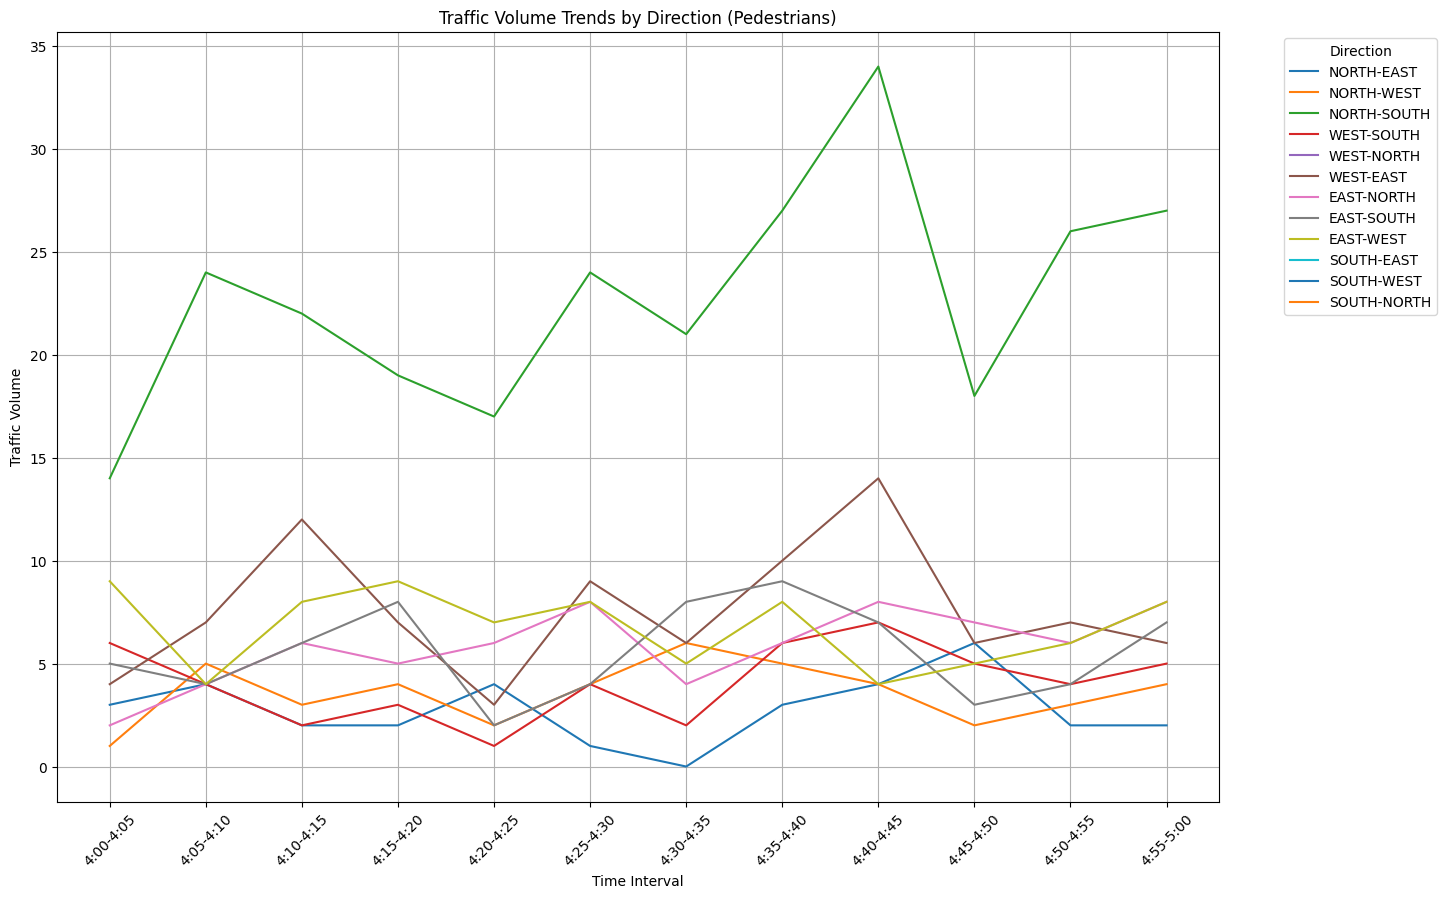

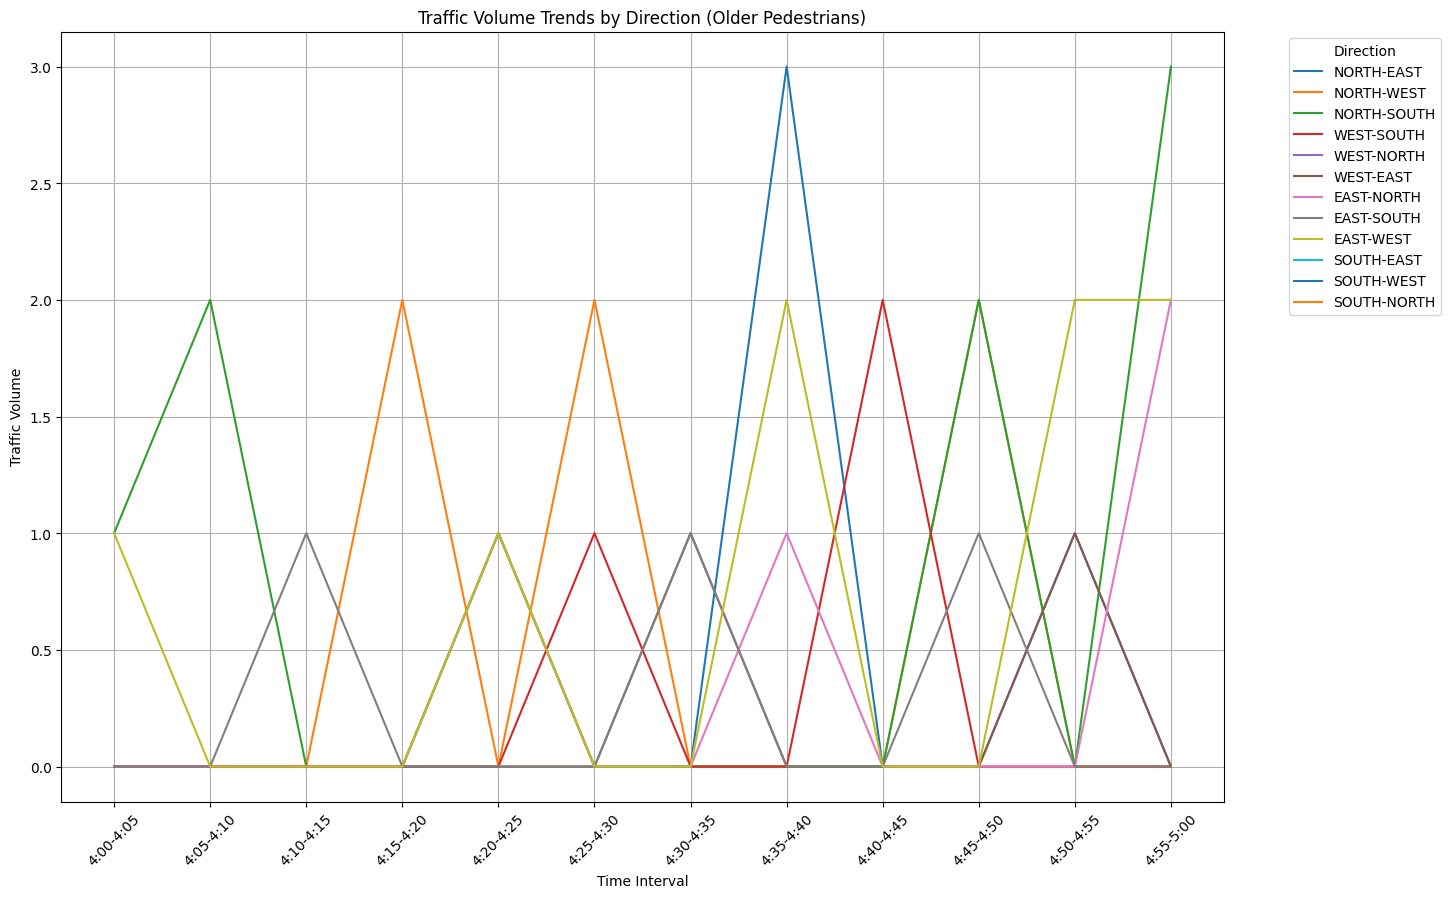

In [29]:
def plot_traffic_data(sheet_data, title):
    time_intervals = sheet_data.iloc[0, 2:]
    directions = sheet_data.iloc[1:, 1]
    traffic = sheet_data.iloc[1:, 2:]
    traffic.columns = time_intervals
    traffic.index = directions
    traffic = traffic.apply(pd.to_numeric, errors='coerce')

    plt.figure(figsize=(15, 10))
    for direction in traffic.index.unique():
        plt.plot(traffic.columns, traffic.loc[direction], label=direction)

    plt.title(f'Traffic Volume Trends by Direction ({title})')
    plt.xlabel('Time Interval')
    plt.ylabel('Traffic Volume')
    plt.xticks(rotation=45)
    plt.legend(title='Direction', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

categories = {
    "Vehicle": "Vehicles",
    "Cyclists": "Cyclists",
    "Pedestrians": "Pedestrians",
    "Older_Pedestrians": "Older Pedestrians"
}

for sheet, title in categories.items():
    plot_traffic_data(data_traffic[sheet], title)

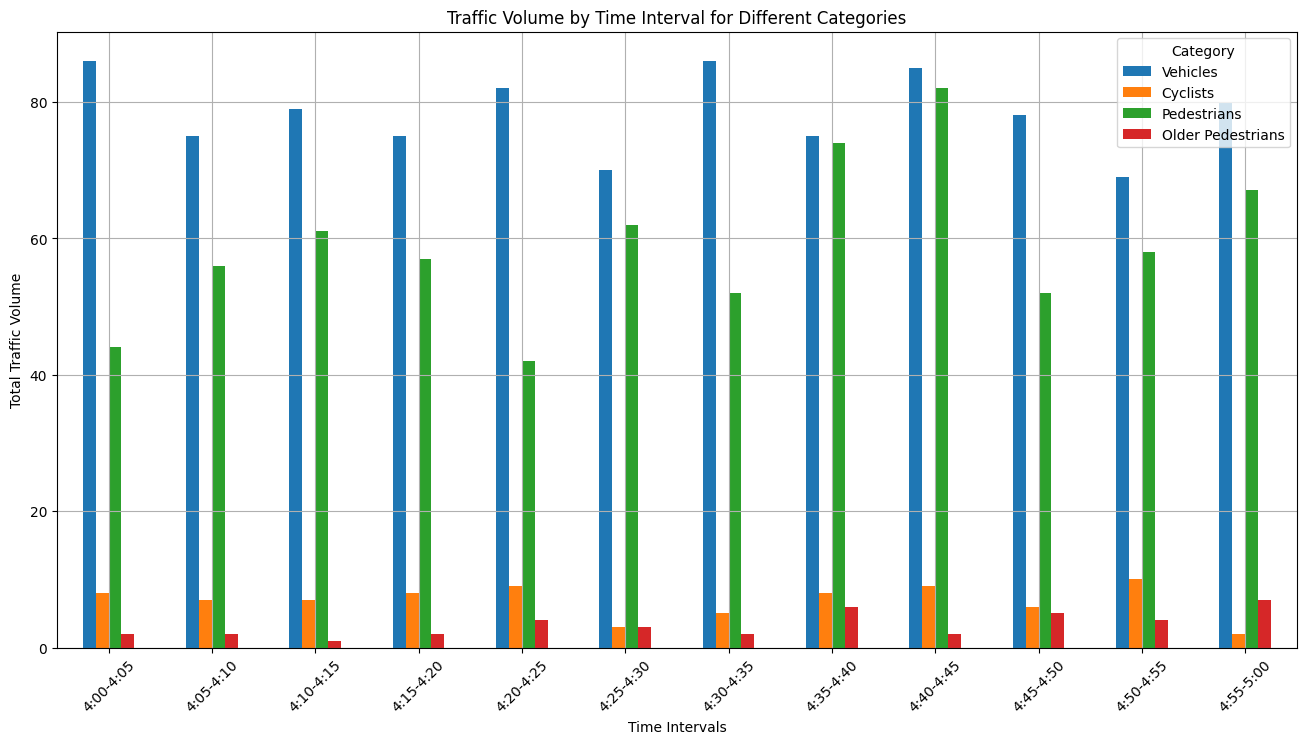

<Figure size 640x480 with 0 Axes>

In [42]:
def process_sheet(data):
    time_columns = data.iloc[0, 2:].values
    data.columns = ['Camera', 'Direction'] + list(time_columns)
    data = data.drop(0)
    data = data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
    return data.sum()

vehicles = process_sheet(data_traffic['Vehicle'])
cyclists = process_sheet(data_traffic['Cyclists'])
pedestrians = process_sheet(data_traffic['Pedestrians'])
older_pedestrians = process_sheet(data_traffic['Older_Pedestrians'])

traffic_types = pd.DataFrame({
    'Vehicles': vehicles,
    'Cyclists': cyclists,
    'Pedestrians': pedestrians,
    'Older Pedestrians': older_pedestrians
})

plt.figure(figsize=(16, 8))
traffic_types.plot(kind='bar', ax=plt.gca())
plt.title('Traffic Volume by Time Interval for Different Categories')
plt.xlabel('Time Intervals')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()

plt.savefig("traffic_volume_for_categories.png")

## Directional Traffic Volume Comparison

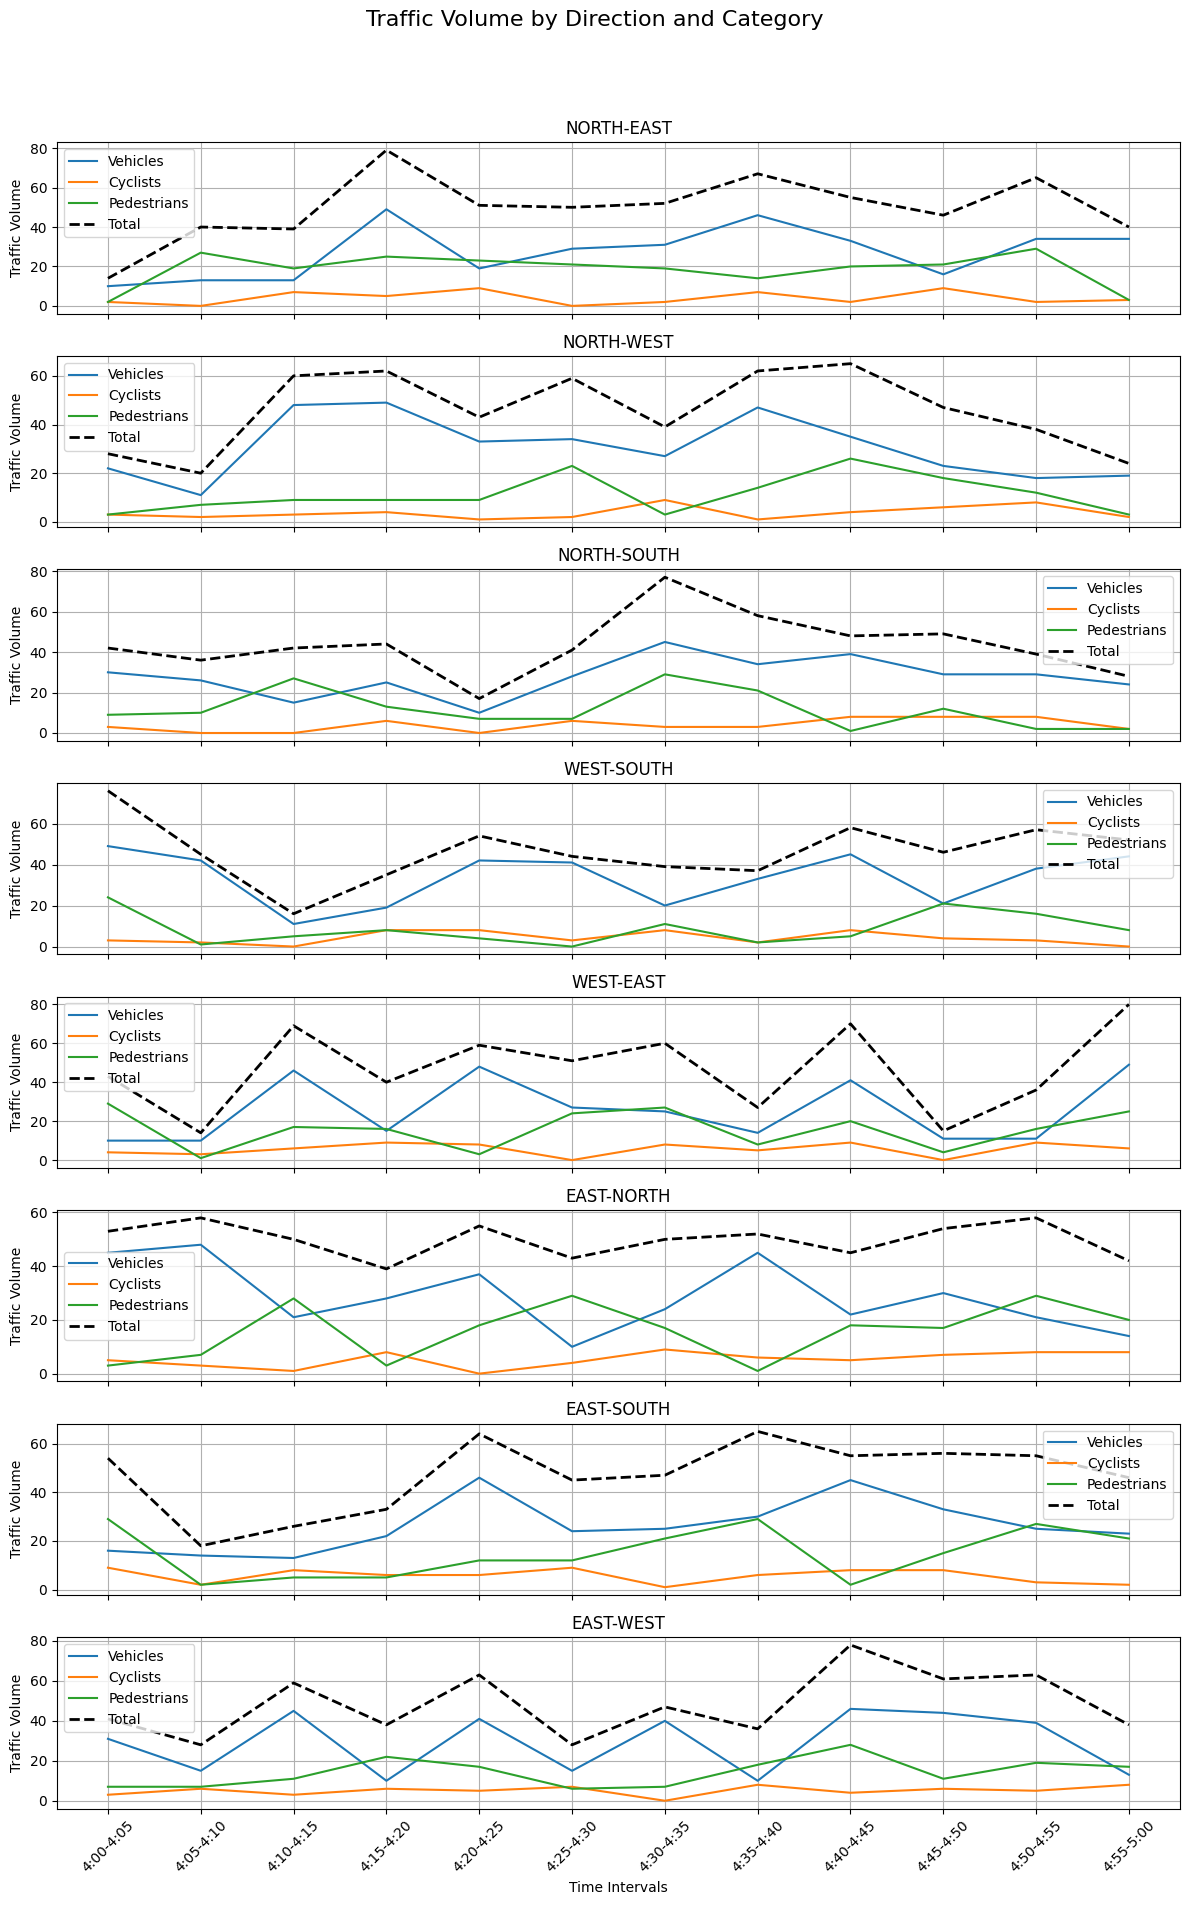

<Figure size 640x480 with 0 Axes>

In [41]:
np.random.seed(0)
time_intervals = ['4:00-4:05', '4:05-4:10', '4:10-4:15', '4:15-4:20', '4:20-4:25', '4:25-4:30', '4:30-4:35', '4:35-4:40', '4:40-4:45', '4:45-4:50', '4:50-4:55', '4:55-5:00']
directions = ['NORTH-EAST', 'NORTH-WEST', 'NORTH-SOUTH', 'WEST-SOUTH', 'WEST-EAST', 'EAST-NORTH', 'EAST-SOUTH', 'EAST-WEST']

data_sheets = {
    'Vehicles': pd.DataFrame(np.random.randint(10, 50, size=(8, 12)), index=directions, columns=time_intervals),
    'Cyclists': pd.DataFrame(np.random.randint(0, 10, size=(8, 12)), index=directions, columns=time_intervals),
    'Pedestrians': pd.DataFrame(np.random.randint(0, 30, size=(8, 12)), index=directions, columns=time_intervals),
}

total_traffic = pd.DataFrame(0, index=directions, columns=time_intervals)
for category, df in data_sheets.items():
    total_traffic += df

fig, axs = plt.subplots(len(directions), 1, figsize=(12, 20), sharex=True)
fig.suptitle('Traffic Volume by Direction and Category', fontsize=16)

for ax, direction in zip(axs, directions):
    for category, df in data_sheets.items():
        ax.plot(df.columns, df.loc[direction], label=category)
    ax.plot(total_traffic.columns, total_traffic.loc[direction], label='Total', color='k', linestyle='--', linewidth=2)
    ax.set_title(direction)
    ax.set_ylabel('Traffic Volume')
    ax.legend()
    ax.grid(True)

plt.xlabel('Time Intervals')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.savefig("traffic_volume_by_direction.png")

# Pedestrian Movement and Safety Concerns

In [45]:
column_names = [
    "Person", "Age", "Mobility_Impairments", "Specific_Impairments",
    "Frequency_Urban_Walking", "Safety_Perception_Rating", "Ease_of_Traffic_Signals",
    "Sufficient_Crossing_Time", "Auditory_Cues_Helpful", "Preference_for_Auditory_Cues",
    "Used_Pedestrian_Tactile_Paving", "Experience_with_Tactile_Paving", "Near_Miss_Experience",
    "Experience_Comments", "Suggested_Improvements"
]

data_questions.columns = column_names

if data_questions.iloc[0, 0].startswith('Big Question:'):
    data_questions = data_questions.drop(index=[0, 1, 2])

data_questions.reset_index(drop=True, inplace=True)

data_questions['Age'] = pd.to_numeric(data_questions['Age'], errors='coerce')
data_questions['Safety_Perception_Rating'] = pd.to_numeric(data_questions['Safety_Perception_Rating'], errors='coerce')

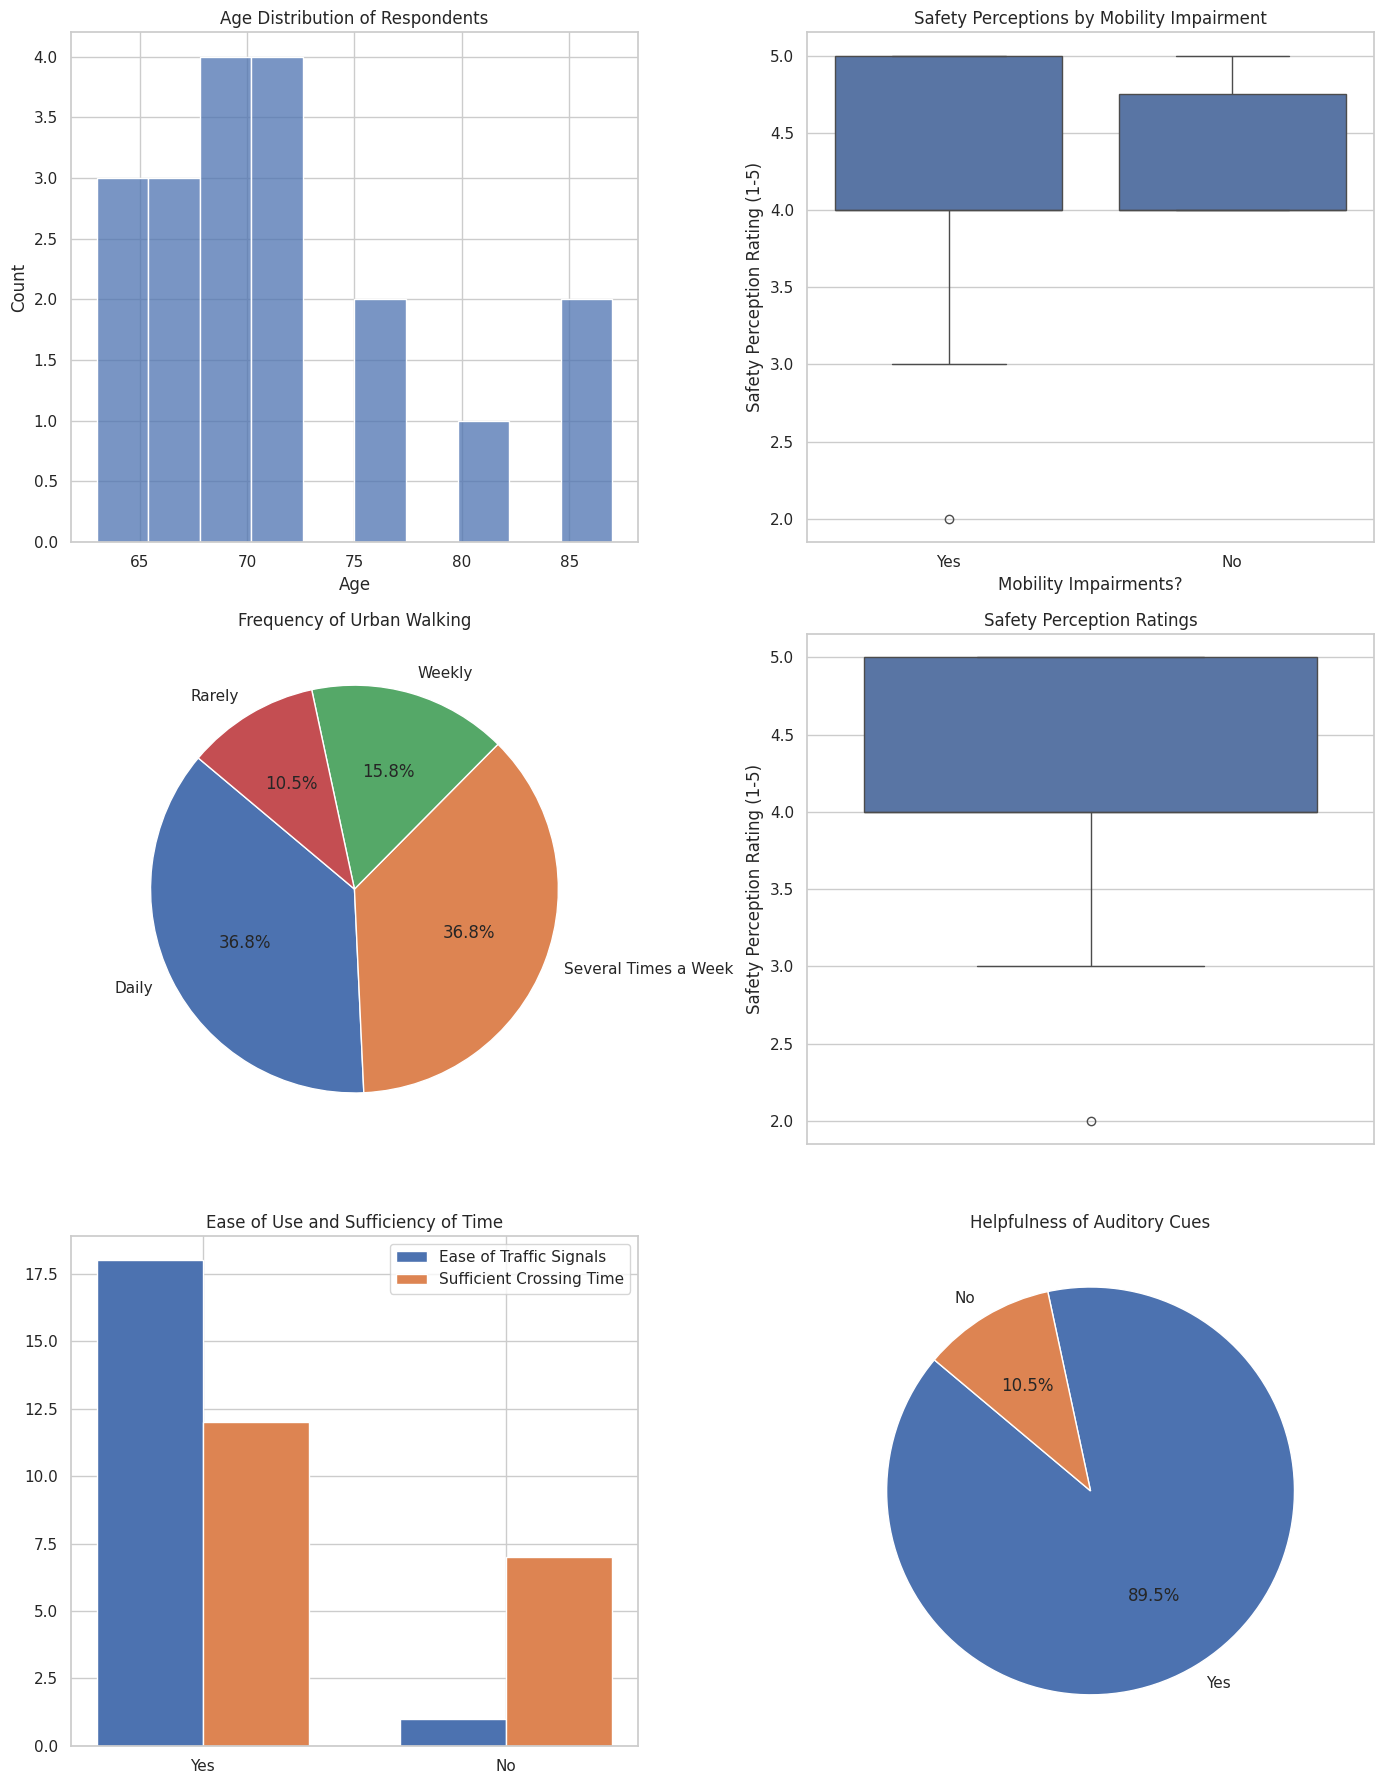

In [47]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

#Plot 1: Age Distribution
sns.histplot(data_questions['Age'].dropna(), bins=10, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of Respondents')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

#Plot 2: Mobility Impairments and Safety Perceptions
sns.boxplot(x='Mobility_Impairments', y='Safety_Perception_Rating', data=data_questions, ax=axes[0, 1])
axes[0, 1].set_title('Safety Perceptions by Mobility Impairment')
axes[0, 1].set_xlabel('Mobility Impairments?')
axes[0, 1].set_ylabel('Safety Perception Rating (1-5)')

#Plot 3: Frequency of Urban Walking
walking_freq_counts = data_questions['Frequency_Urban_Walking'].value_counts()
axes[1, 0].pie(walking_freq_counts, labels=walking_freq_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Frequency of Urban Walking')

#Plot 4: Safety Perception Ratings
sns.boxplot(y=data_questions['Safety_Perception_Rating'], ax=axes[1, 1])
axes[1, 1].set_title('Safety Perception Ratings')
axes[1, 1].set_ylabel('Safety Perception Rating (1-5)')

#Plot 5: Ease of Use and Sufficiency of Time
ease_of_use = data_questions['Ease_of_Traffic_Signals'].value_counts()
sufficient_time = data_questions['Sufficient_Crossing_Time'].value_counts()
indices = ease_of_use.index.intersection(sufficient_time.index)
bar_width = 0.35
r1 = range(len(indices))
r2 = [x + bar_width for x in r1]

axes[2, 0].bar(r1, ease_of_use[indices], width=bar_width, label='Ease of Traffic Signals')
axes[2, 0].bar(r2, sufficient_time[indices], width=bar_width, label='Sufficient Crossing Time')
axes[2, 0].set_title('Ease of Use and Sufficiency of Time')
axes[2, 0].set_xticks([r + bar_width/2 for r in range(len(indices))])
axes[2, 0].set_xticklabels(indices)
axes[2, 0].legend()

#Plot 6: Auditory Cues and Tactile Paving Usage
auditory_helpful = data_questions['Auditory_Cues_Helpful'].value_counts()
axes[2, 1].pie(auditory_helpful, labels=auditory_helpful.index, autopct='%1.1f%%', startangle=140)
axes[2, 1].set_title('Helpfulness of Auditory Cues')

plt.tight_layout()
plt.show()

# Advanced Visualizations for Deeper Insights

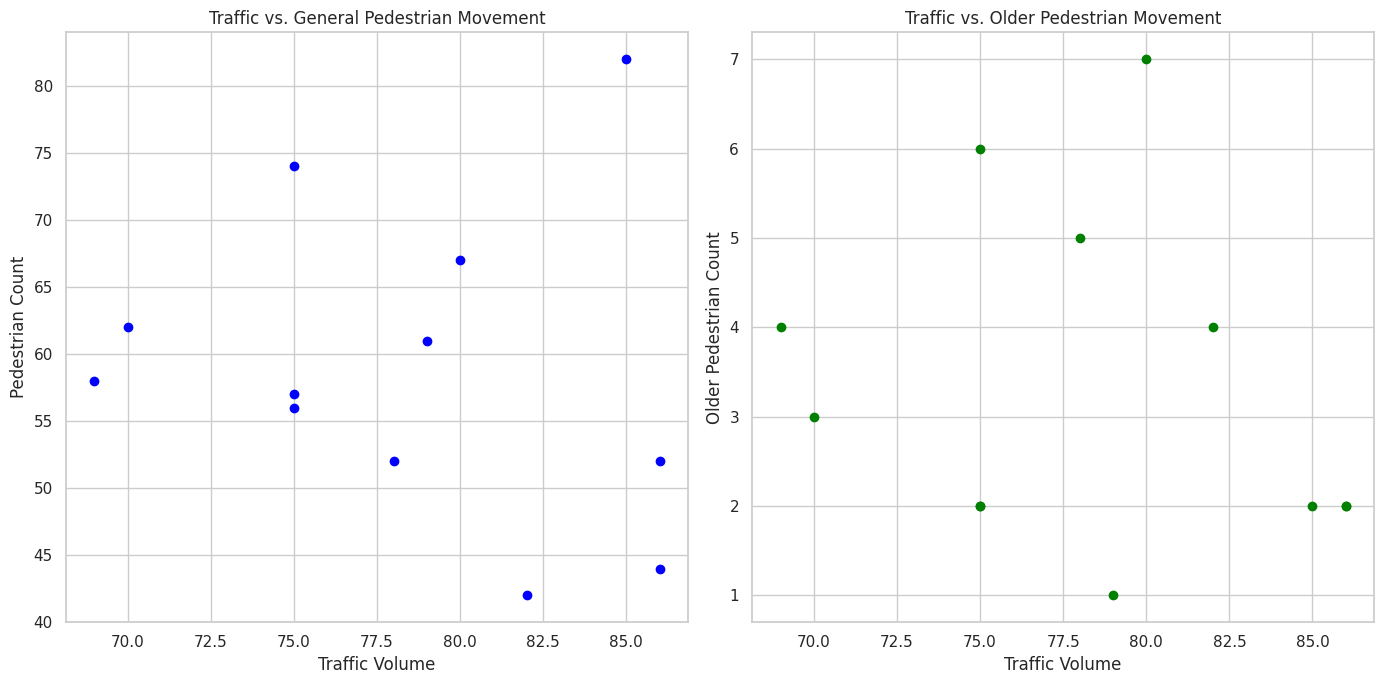

In [53]:
vehicle_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/BigData_Report/traffic1.xlsx', sheet_name='Vehicle')
pedestrian_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/BigData_Report/traffic1.xlsx', sheet_name='Pedestrians')
older_pedestrian_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/BigData_Report/traffic1.xlsx', sheet_name='Older_Pedestrians')

traffic_data_cleaned = vehicle_data.drop(index=[0], axis=0)
traffic_data_cleaned.columns = ['Camera', 'Direction'] + list(vehicle_data.iloc[0, 2:])
traffic_data_cleaned = traffic_data_cleaned.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
total_traffic = traffic_data_cleaned.sum()

pedestrian_data_cleaned = pedestrian_data.drop(index=[0], axis=0)
pedestrian_data_cleaned.columns = ['Camera', 'Direction'] + list(pedestrian_data.iloc[0, 2:])
pedestrian_data_cleaned = pedestrian_data_cleaned.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
total_pedestrians = pedestrian_data_cleaned.sum()

older_pedestrian_data_cleaned = older_pedestrian_data.drop(index=[0], axis=0)
older_pedestrian_data_cleaned.columns = ['Camera', 'Direction'] + list(older_pedestrian_data.iloc[0, 2:])
older_pedestrian_data_cleaned = older_pedestrian_data_cleaned.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
total_older_pedestrians = older_pedestrian_data_cleaned.sum()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(total_traffic, total_pedestrians, color='blue')
plt.title('Traffic vs. General Pedestrian Movement')
plt.xlabel('Traffic Volume')
plt.ylabel('Pedestrian Count')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(total_traffic, total_older_pedestrians, color='green')
plt.title('Traffic vs. Older Pedestrian Movement')
plt.xlabel('Traffic Volume')
plt.ylabel('Older Pedestrian Count')
plt.grid(True)

plt.tight_layout()
plt.show()